## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 20 column and 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
##summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [12]:
##Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
#df['Reviews'].astype(int)

In [14]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


the row is shifted towards left, rating shd be 1.9 reviews shd be 19 and size shd be 3.0M 

In [15]:
#df.loc[10472, "Reviews"] = 3000000

In [16]:
df.iloc[10472, 1:]

Category                        1.9
Rating                         19.0
Reviews                        3.0M
Size                         1,000+
Installs                       Free
Type                              0
Price                      Everyone
Content Rating                  NaN
Genres            February 11, 2018
Last Updated                 1.0.19
Current Ver              4.0 and up
Android Ver                     NaN
Name: 10472, dtype: object

In [17]:
value_array = np.insert(df.iloc[10472, 1:-1].values, 0, np.NaN)
value_array

array([nan, '1.9', 19.0, '3.0M', '1,000+', 'Free', '0', 'Everyone', nan,
       'February 11, 2018', '1.0.19', '4.0 and up'], dtype=object)

In [18]:
df.iloc[10472, 1:] = value_array

In [19]:
df.loc[10472] #Successfully shifted to right

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df[df['Reviews'].str.isnumeric()!=True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [22]:
df_copy=df.copy()

In [23]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10840 non-null  object
 2   Rating          9367 non-null   object
 3   Reviews         10841 non-null  int32 
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10840 non-null  object
 7   Price           10841 non-null  object
 8   Content Rating  10841 non-null  object
 9   Genres          10840 non-null  object
 10  Last Updated    10841 non-null  object
 11  Current Ver     10833 non-null  object
 12  Android Ver     10839 non-null  object
dtypes: int32(1), object(12)
memory usage: 1.0+ MB


In [25]:
df_copy["Rating"] = df_copy["Rating"].astype(float)

In [26]:
df_copy["Size"].apply(lambda x: x[len(x)-1]).unique()

array(['M', 'e', 'k'], dtype=object)

In [27]:
x="19.7*1000"
eval(x)

19700.0

In [28]:
df_copy["Size"] = df_copy["Size"].replace({"k":"", "Varies with device":np.nan}, regex=True).apply(lambda x: eval(str(x).replace("M","*1000")) if "M" in str(x) else x).astype(float)

In [29]:
df_copy["Size"]

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836    53000.0
10837     3600.0
10838     9500.0
10839        NaN
10840    19000.0
Name: Size, Length: 10841, dtype: float64

In [30]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [31]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [32]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [33]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int32  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1016.5+ KB


In [35]:
## Handlling Last update feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [36]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year
df_copy.drop("Last Updated", axis=1, inplace=True)

In [37]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [38]:
df_copy.duplicated("App").sum()

1181

In [39]:
df_copy.shape

(10841, 15)

In [40]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='last')

In [41]:
df_copy.shape

(9660, 15)

In [42]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [43]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

ROBLOX                                               0.083018
CBS Sports App - Scores, News, Stats & Watch Live    0.073794
Candy Crush Saga                                     0.064570
ESPN                                                 0.064570
8 Ball Pool                                          0.064570
                                                       ...   
BQ Wings                                             0.009224
FD VR Player - for Youtube 3D                        0.009224
Electric Car Charging Points: Ev charger Stations    0.009224
Diario Financiero                                    0.009224
My Emma :)                                           0.009224
Name: App, Length: 9660, dtype: float64
---------------------------
FAMILY                 18.191882
GAME                   10.553506
TOOLS                   7.776753
MEDICAL                 4.271218
BUSINESS                4.243542
PRODUCTIVITY            3.911439
PERSONALIZATION         3.616236
COMMUNICATION      

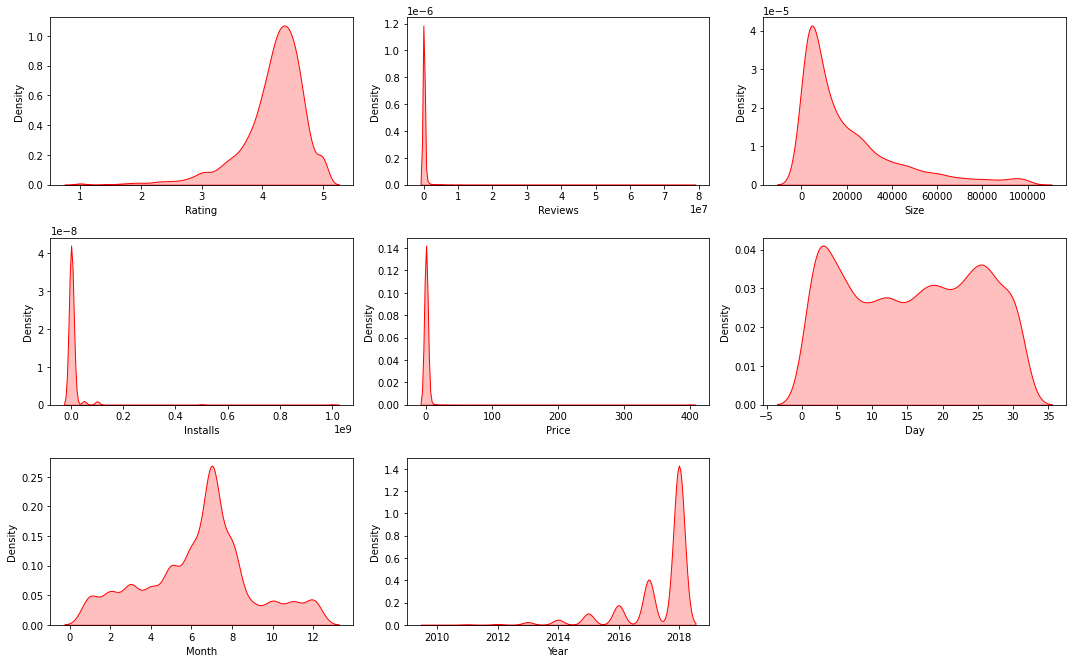

In [44]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15,15))
for i in range(len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]], shade=True, color="r")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

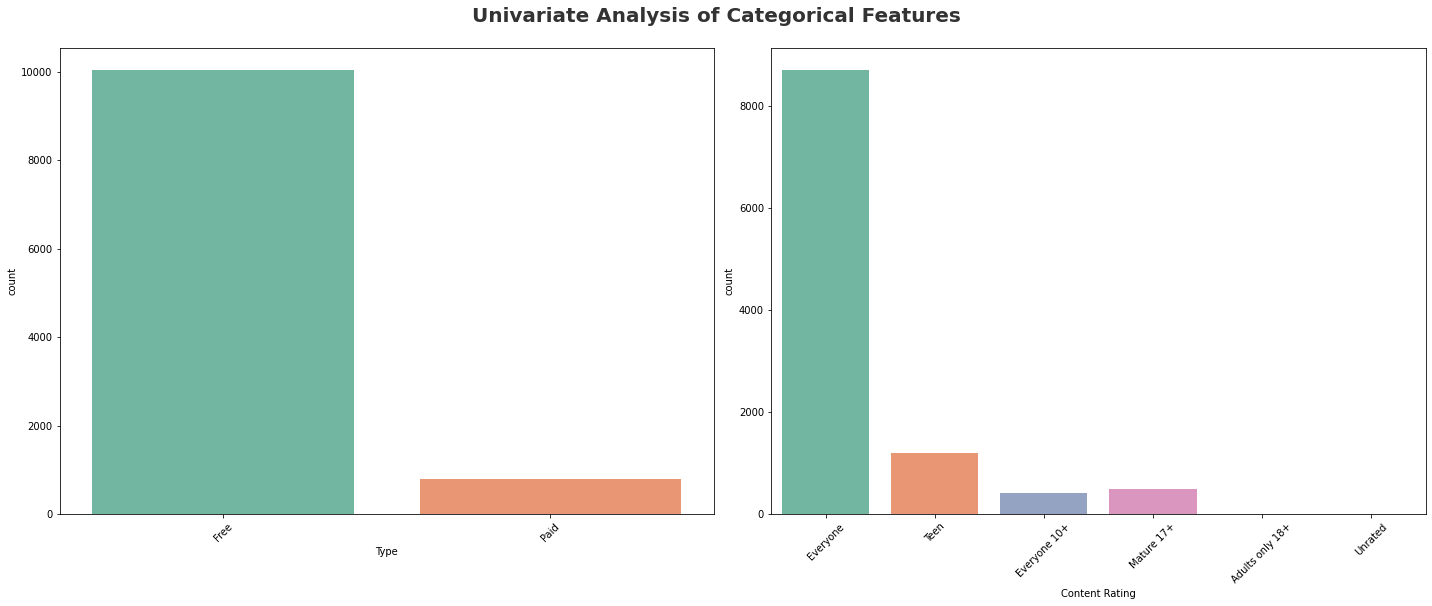

In [45]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

## Which is the most popular app category?

In [46]:
df_copy["Category"].value_counts().head()

FAMILY      1906
GAME         926
TOOLS        829
BUSINESS     419
MEDICAL      396
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

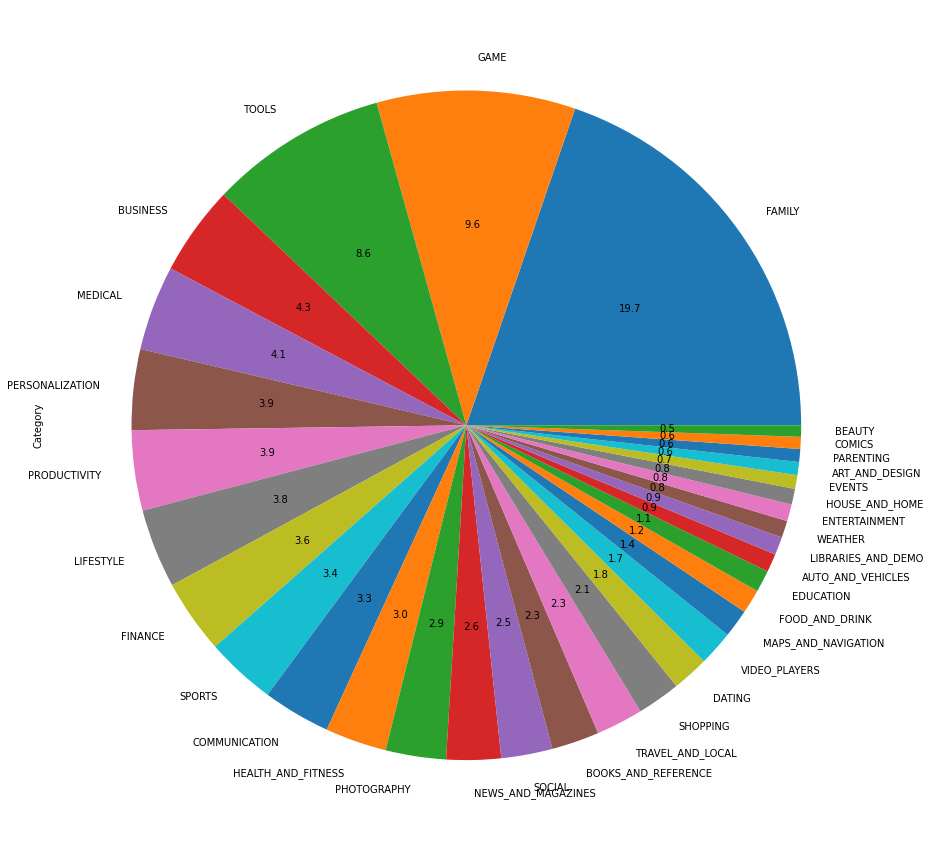

In [47]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

## Observations

1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [48]:
## Top 10 App Categories
df_category = pd.DataFrame(df_copy["Category"].value_counts()).reset_index().rename(columns={"Category":"Count", "index":"Category"})
df_category.head()

,Category,Count
0,FAMILY,1906
1,GAME,926
2,TOOLS,829
3,BUSINESS,419
4,MEDICAL,396


In [49]:
df_category["rank"] = df_category["Count"].rank(method="dense", ascending=False)

In [50]:
df_category[df_category["rank"]<=10]

,Category,Count,rank
0,FAMILY,1906,1.0
1,GAME,926,2.0
2,TOOLS,829,3.0
3,BUSINESS,419,4.0
4,MEDICAL,396,5.0
5,PERSONALIZATION,376,6.0
6,PRODUCTIVITY,374,7.0
7,LIFESTYLE,369,8.0
8,FINANCE,345,9.0
9,SPORTS,327,10.0


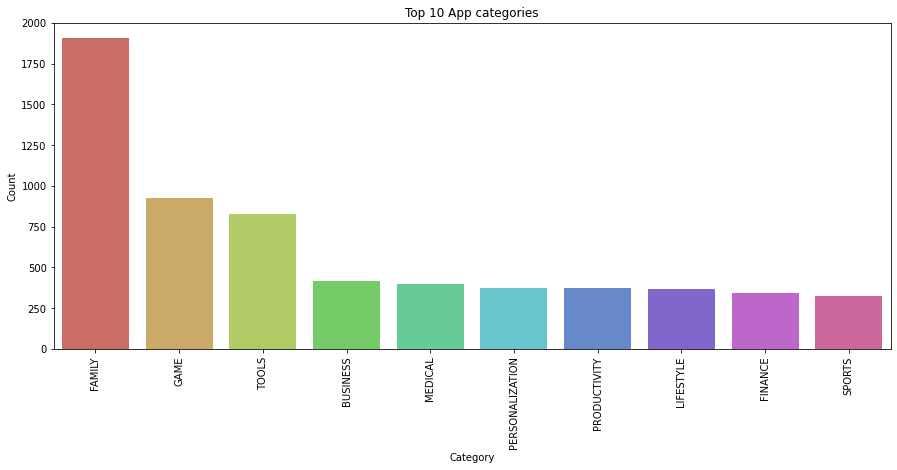

In [51]:
#top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x="Category", y="Count", data=df_category[df_category["rank"]<=10], palette="hls")
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Which Category has largest number of installations??

In [58]:
df_categ_Install = df_copy.groupby(["Category"])["Installs"].sum().sort_values(ascending=False).reset_index()
df_categ_Install["Installs"] = df_categ_Install["Installs"]/10**9 #convert to billon
df_categ_Install["Rank"] = df_categ_Install["Installs"].rank(method="dense", ascending=False)
df_categ_Install_Top10 = df_categ_Install[df_categ_Install["Rank"]<=10]
df_categ_Install_Top10.head()

,Category,Installs,Rank
0,COMMUNICATION,11.039276,1.0
1,GAME,10.897924,2.0
2,FAMILY,8.870643,3.0
3,TOOLS,8.102772,4.0
4,PRODUCTIVITY,5.788091,5.0


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

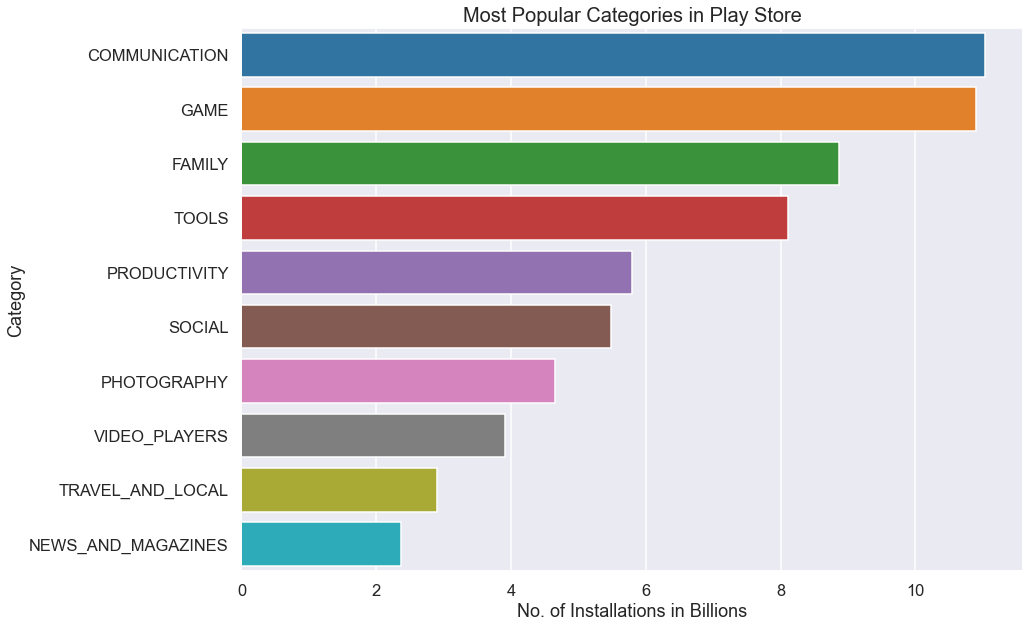

In [60]:
plt.figure(figsize=(14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x="Installs", y="Category", data=df_categ_Install_Top10)
ax.set_xlabel('No. of Installations in Billions')
ax.set_title("Most Popular Categories in Play Store", size = 20)


## Insights
1. Out of all the categories "COMMUNICATION and GAME" has the most number of Installations.
2. With almost 35 Billion Installations COMMUNICATION and GAME is the most popular Category in Google App store

In [65]:
df_copy.duplicated(["Category", "App"]).sum()

0

In [121]:
df_categ_Install_Apps = df_copy.groupby(["Category", "App"])["Installs"].sum().reset_index()
df_categ_Install_Apps["Installs"] = df_categ_Install_Apps["Installs"]/10**6 #convert to million
df_categ_Install_Apps["App_Rank"] = df_categ_Install_Apps["Installs"].rank(method="dense", ascending=False)
df_categ_Install_Apps_Top5 = df_categ_Install_Apps[df_categ_Install_Apps["App_Rank"]<=5].sort_values(["Category", "App_Rank"])

In [116]:
df_categ_Install_Apps_Top5.head()

,Category,App,Installs,App_Rank
46,ART_AND_DESIGN,Sketch - Draw & Paint,50.0,4.0
9,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10.0,5.0
50,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10.0,5.0
53,ART_AND_DESIGN,Textgram - write on photos,10.0,5.0
59,ART_AND_DESIGN,ibis Paint X,10.0,5.0


In [117]:
top5_categ = df_categ_Install_Top10[df_categ_Install_Top10["Rank"]<=5]["Category"].to_list()
top10_categ = df_categ_Install_Top10["Category"].to_list()
top5_categ, top10_categ

(['COMMUNICATION', 'GAME', 'FAMILY', 'TOOLS', 'PRODUCTIVITY'],
 ['COMMUNICATION',
  'GAME',
  'FAMILY',
  'TOOLS',
  'PRODUCTIVITY',
  'SOCIAL',
  'PHOTOGRAPHY',
  'VIDEO_PLAYERS',
  'TRAVEL_AND_LOCAL',
  'NEWS_AND_MAGAZINES'])

In [118]:
#df_Top5_categ_Top5_Apps = df_categ_Install_Apps_Top5[df_categ_Install_Apps_Top5["Category"].isin(top5_categ)]
df_categ_Install_Apps_Top5

,Category,App,Installs,App_Rank
1052,COMMUNICATION,Gmail,1000.0,1.0
1055,COMMUNICATION,Google Chrome: Fast & Secure,1000.0,1.0
1061,COMMUNICATION,Hangouts,1000.0,1.0
1096,COMMUNICATION,Messenger – Text and Video Chat for Free,1000.0,1.0
1142,COMMUNICATION,Skype - free IM & video calls,1000.0,1.0
...,...,...,...,...
9160,TOOLS,ZenUI Help,10.0,5.0
9161,TOOLS,"ZenUI Keyboard – Emoji, Theme",10.0,5.0
9189,TOOLS,myMetro,10.0,5.0
9192,TOOLS,osmino Wi-Fi: free WiFi,10.0,5.0


In [123]:
df_Top5_categ_Top5_Apps[df_Top5_categ_Top5_Apps["Category"]=="SOCIAL"].head(5)

,Category,App,Installs,App_Rank


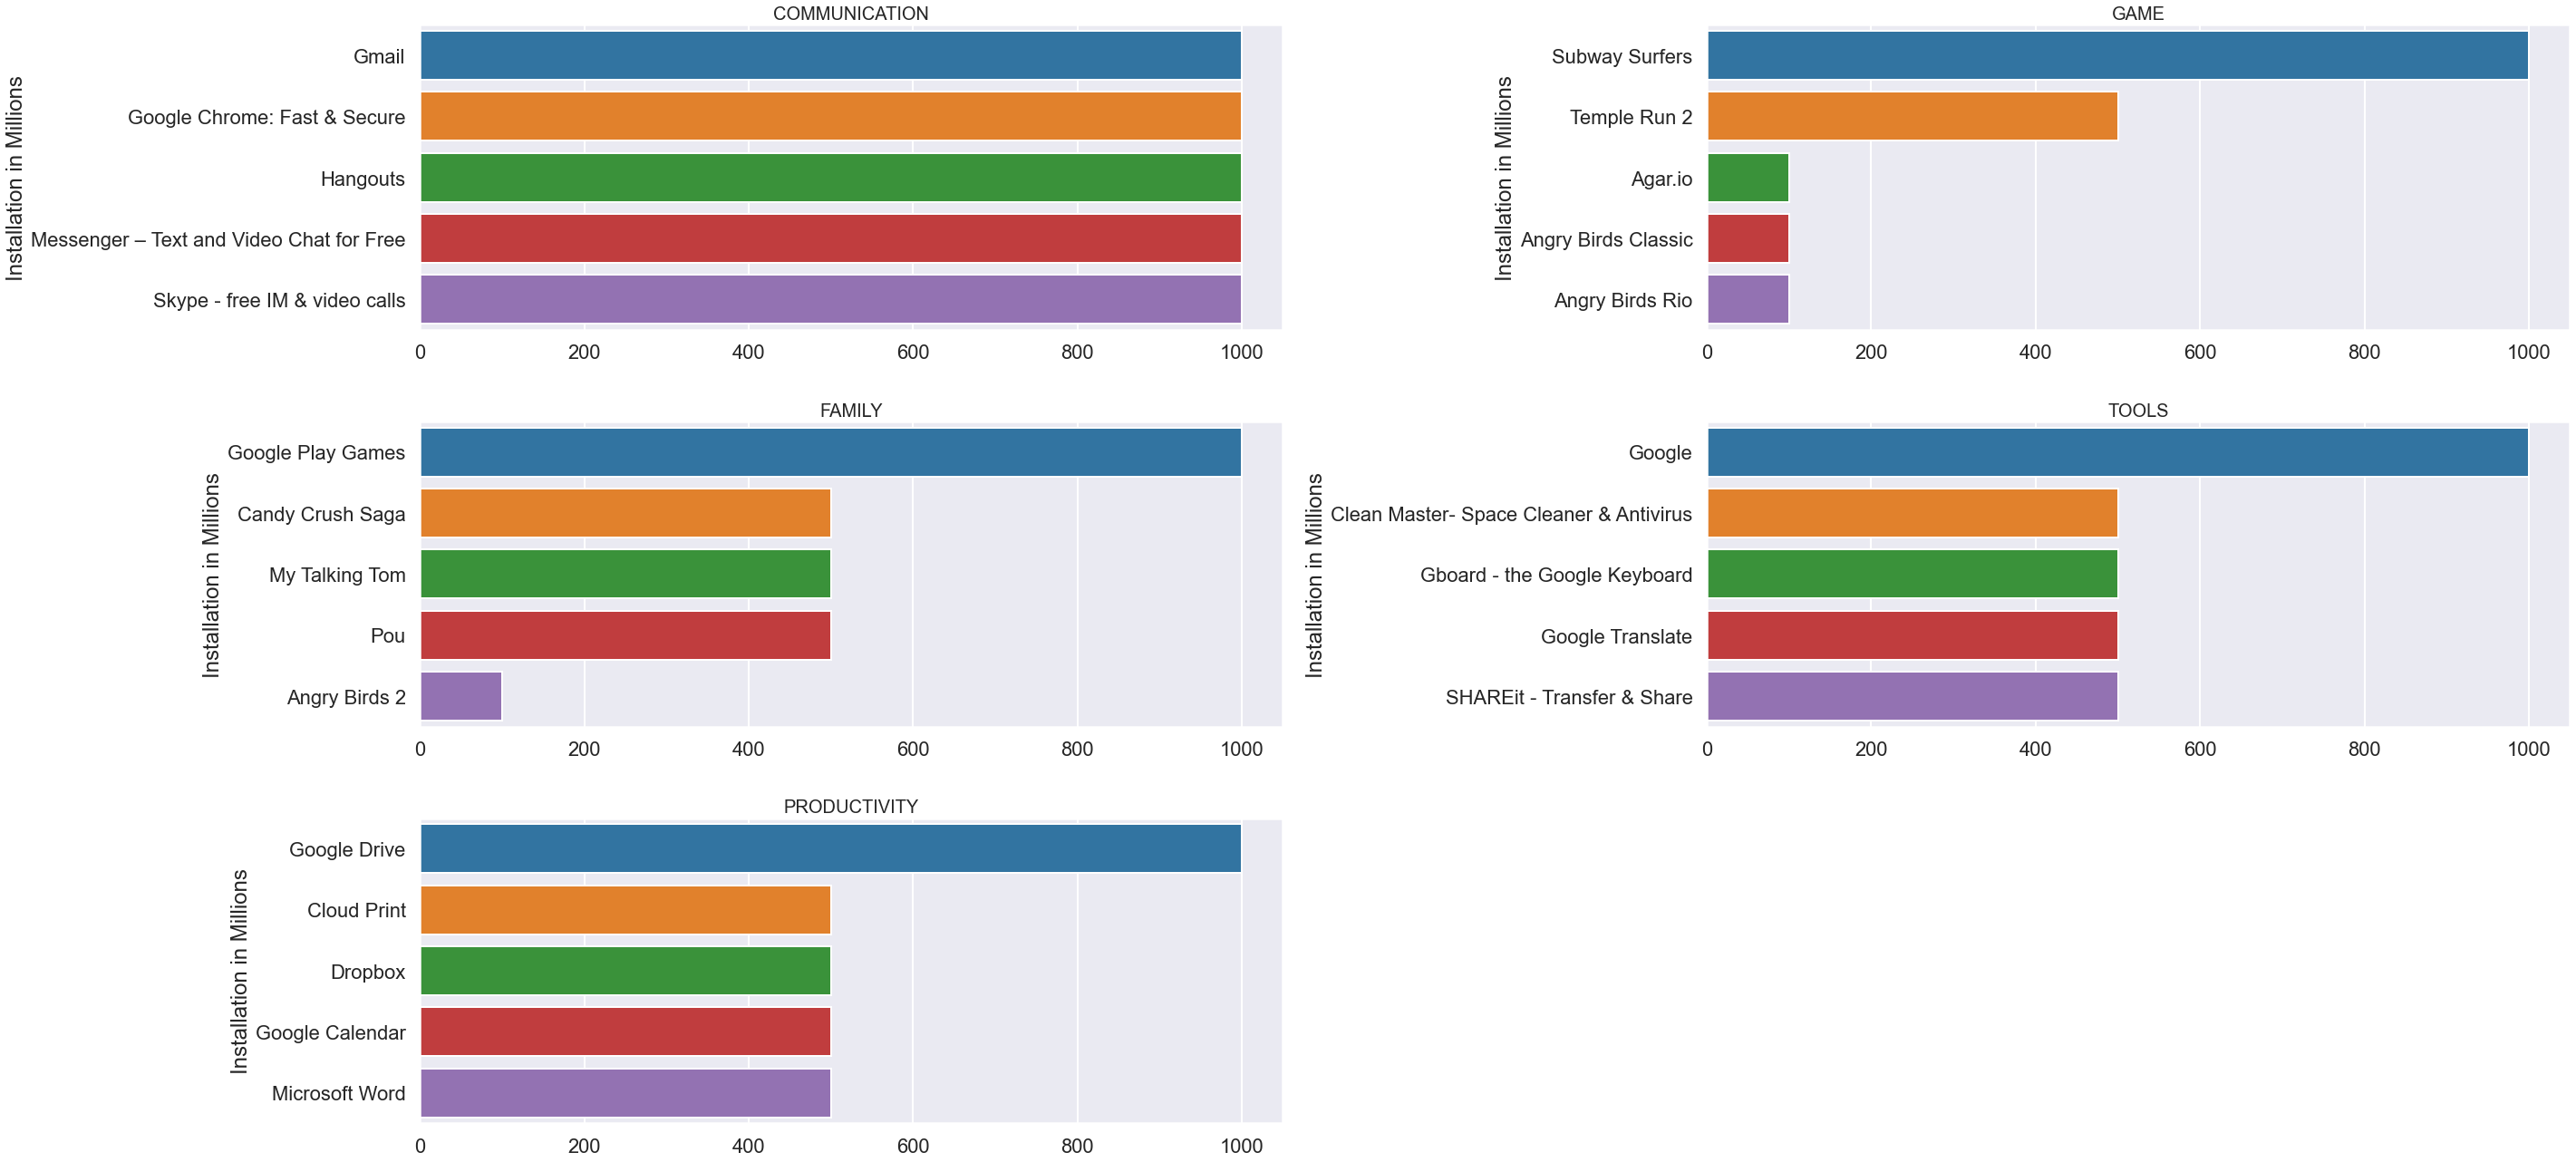

In [119]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(40,30))

for i, categ in enumerate(top5_categ):
    df_data = df_Top5_categ_Top5_Apps[df_Top5_categ_Top5_Apps["Category"]==categ].head(5)
    plt.subplot(5,2,i+1)
    sns.barplot(data=df_data, x="Installs", y="App")
    plt.xlabel("")
    plt.ylabel('Installation in Millions')
    plt.title(categ, size=20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

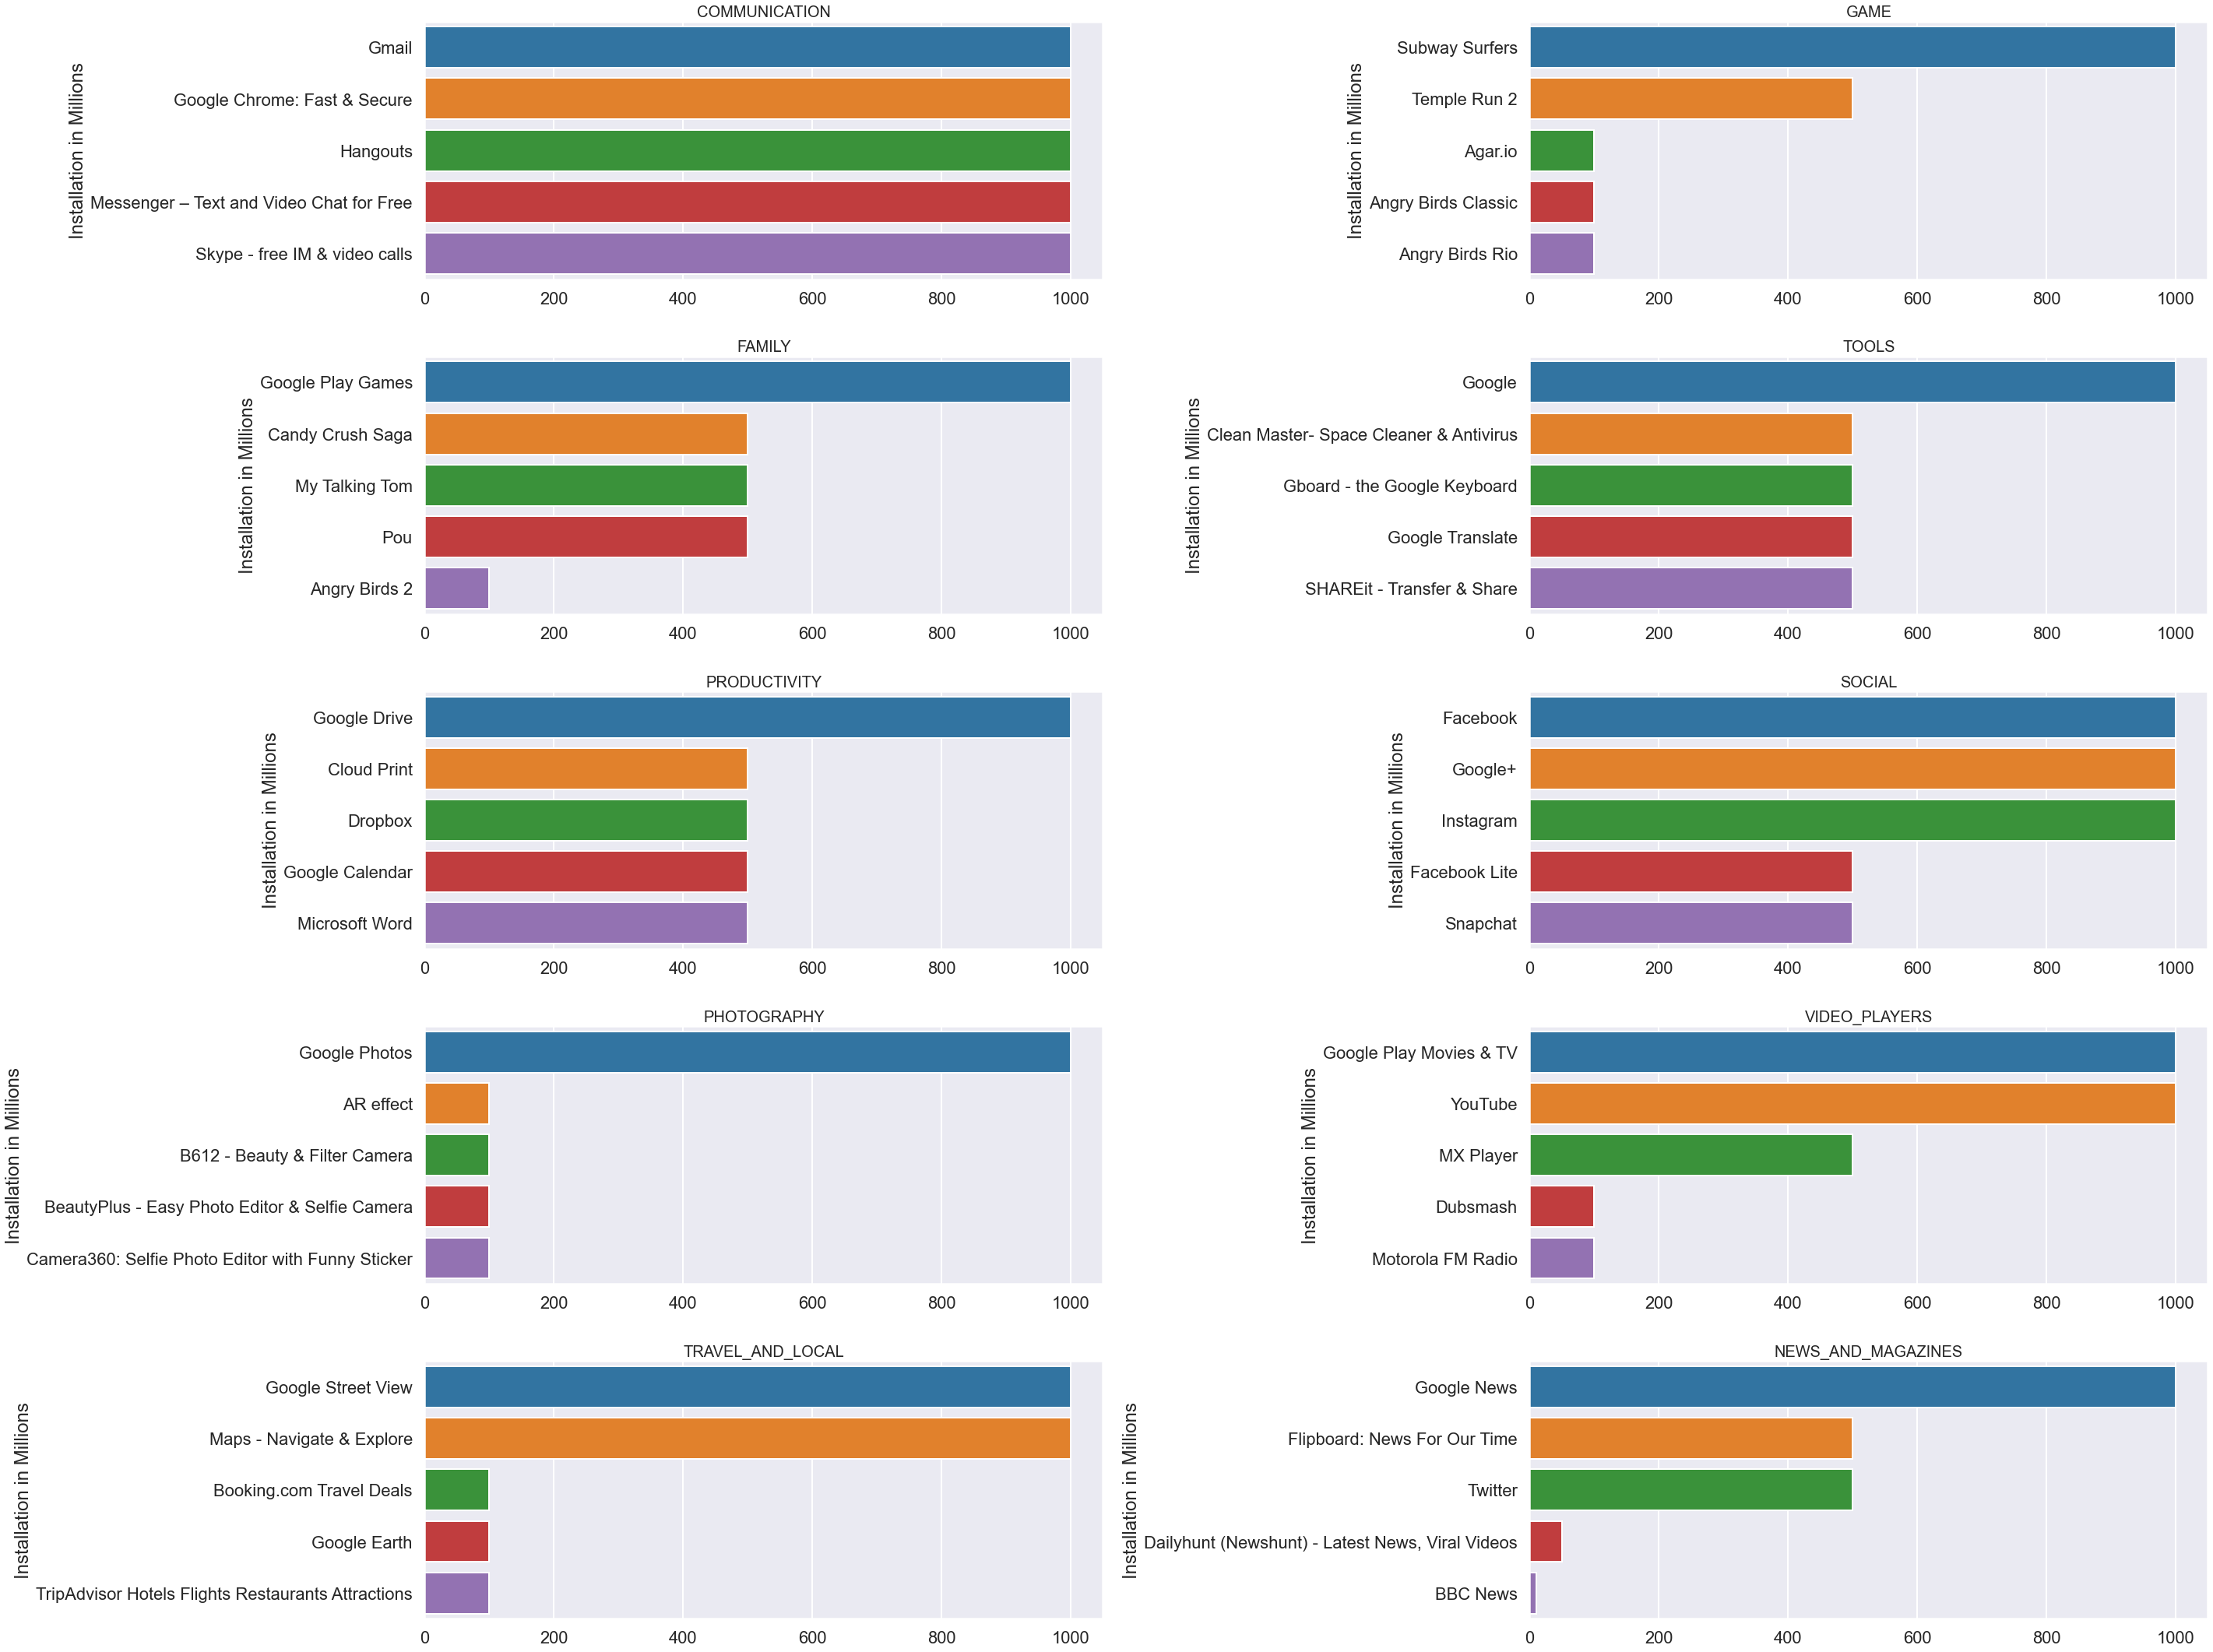

In [124]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(40,30))

for i, categ in enumerate(top10_categ):
    df_data = df_categ_Install_Apps_Top5[df_categ_Install_Apps_Top5["Category"]==categ].head(5)
    plt.subplot(5,2,i+1)
    sns.barplot(data=df_data, x="Installs", y="App")
    plt.xlabel("")
    plt.ylabel('Installation in Millions')
    plt.title(categ, size=20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## How many apps are there on Google Play Store which get 5 ratings??

In [128]:
df_5_rating_App = df_copy[df_copy.Rating == 5][['Category','Installs', 'App', 'Rating']]
df_5_rating_App.shape[0]

271

Result:
1. There are 271 apps with 5 Rating

In [129]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,1.0,2.3 and up,26,3,2017
